# Corey's Workspace
## Do not touch
### A place for Corey to work quietly away from others. Thank you

In [5]:
%matplotlib inline

from math import *
from modsim import *

In [3]:
#Corey's work will be placed here
print("What")
fun(74)



What
Not a happy number :(
[65, 61, 37, 58, 89, 145, 42, 20, 4, 16, 37]


# Run Space

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


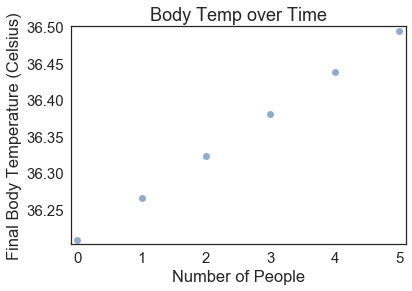

In [13]:
sys = make_system(T_env=0,t_end=30,lbs=62
                                 ) #Creates system

#run_sim(sys,update)

#plot_sim(sys)


xsweep(sys,0,5,1,True)

#print(sys.results)


# Functions Used

In [9]:
def make_system(T_env=0, t_end=10, lbs=62, mu=.002, x=1,r_i =.0008, dt=1):
    T_i = 37                                            #initial temp
    c_lbs = 3500                                              
    init = State(temp=T_i)
    
    c = c_lbs * lbs
    r = r_i - .0005*(x-1)
    
    system = System(init=init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end, dt=dt, T_i=T_i)
    return system

def update(state, dt, system): #updates the temperature using the function we developed
    unpack(system)
    T = state.temp
    
    T += -r * (T - T_env)*dt + mu * (x+1) #T is the temp of the person in the center
    #print(T)
    return State(temp=T)


def run_sim(system, update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    ts = linrange(system.t0, system.t_end, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], system.dt, system)
        #frame.loc[t+1] = update(system)
    
    system.results = frame
    
    
def plot_sim(system):               #simple plot function, needs to be updated to make it look prettier
    plot(system.results, style= 'b-', label= 'temp')
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    #savefig('ind_body_temp.pdf')
    
def rsweep(system,r1,r2,st):
    newfig()
    lin = linrange(r1,r2,st)
    for x in lin:
        system.r = x
        run_sim(system,update)
        plot(system.results)
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')

def xsweep(system,x1,x2,st,boo):
    newfig()
    lin = linrange(x1,x2,st)
    for x in lin:
        system.x = x
        run_sim(system,update)
        if boo:
            plot(x,system.results.loc[system.t_end-1],'o')
        else:
            plot(system.results)
    if boo:
         decorate(xlabel='Number of People',
             ylabel='Final Body Temperature (Celsius)',
             title='Body Temp over Time')       
    else:
        decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    


    
    

##################################################

def find_r(T_i, T_f, T_env, ):
    coef = log((T_f - T_env) / (T_i - T_env))
    return -coef / dt

def fun(x): #test FUNction
    a = []
    y = True
    while(y): #Endless while loops, yay!
        b = [int(d) for d in str(x)] #Odd syntax but it works to create a list of the digits of a given number
        sum1 = 0
        for f in b:
            sum1 += f**2
        if sum1 == 1:
            print("Happy number!")
            print(a)
            return
        elif sum1 in a:
            print("Not a happy number :(")
            a.append(sum1)
            print(a)
            return
        else:
            a.append(sum1)
        x = sum1